In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [48]:
class LucasPCA: 
    def __init__(self, n_components = None, standarization=True):
        self.n_components = n_components
        self.W = None
        self.standarization = standarization

    def standarize(self, data):
        if self.standarization:
            return np.nan_to_num((data - self.mean)/self.std)
        else:
            return data

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        standarized_X = self.standarize(X)
        #Get projection matrix
        cov_x   = np.cov(standarized_X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov_x)
        eigenvalues_order = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[eigenvalues_order]
        print sorted_eigenvalues.shape
        sorted_eigenvectors = eigenvectors[:,eigenvalues_order]
        self.W = sorted_eigenvectors
        if self.n_components is not None:
            self.W = self.W[:,:self.n_components]
        return standarized_X
        
    
    def transform(self, X):
        standarized_X = self.standarize(X)
        return np.dot(standarized_X, self.W)
    
    def fit_transform(self, X):
        standarized_X = self.fit(X)
        return self.transform(standarized_X)

In [20]:
class StandarizedPCA:

    def __init__(self, n_components=None):
        self.n_components = n_components
        if n_components is not None:
            self.pca = PCA(n_components=n_components)
        else:
            self.pca = PCA()

    def standarize(self, data):
        return np.nan_to_num((data - self.mean)/self.std)


    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        standarized_X = self.standarize(X)
        self.pca.fit(X)

    def transform(self, X):
        standarized_X = self.standarize(X)
        return self.pca.transform(X)

    def fit_transform(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        standarized_X = self.standarize(X)
        return self.pca.fit_transform(X)

In [30]:
def plot_histogram(name, array):
    mean = np.mean(array)
    std = np.std(array)
    median = np.median(array)
    min_ = np.min(array)
    max_ = np.max(array)
    plt.clf()
    plt.hist(array)
    plt.title('{0}\nmean = {1}, std = {2}\nmedian = {3}\nmin = {4}, max = {5}'.format(name, mean, std, median, min_, max_))
    #plt.savefig('{0}.png'.format(name), bbox_inches='tight')
    plt.show()
    
def plot_distributions(data):
    for i in range(data.shape[1]):
        col = data[:,i]
        plot_histogram('feature{0}'.format(i), col)

In [22]:
def get_uniform_data(n_data, n_features):
    return np.random.uniform(0,1,n_data*n_features).reshape((n_data, n_features))

In [57]:
data = get_uniform_data(6000,60)

# Uniform features distribution

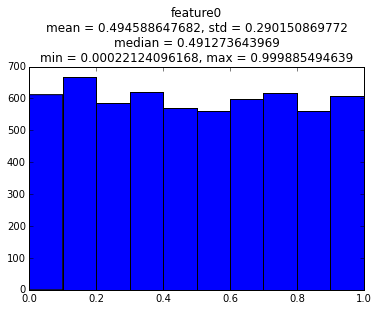

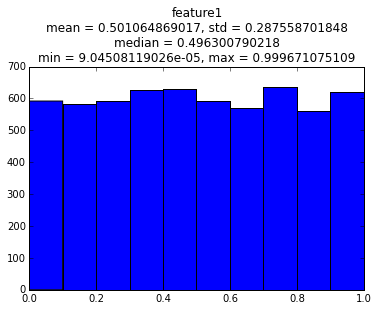

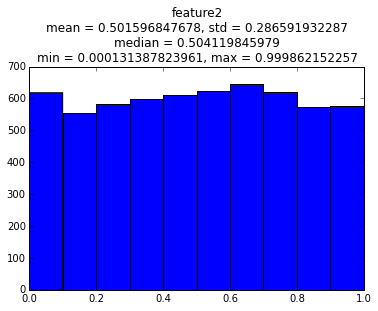

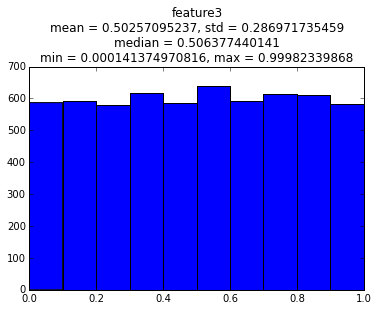

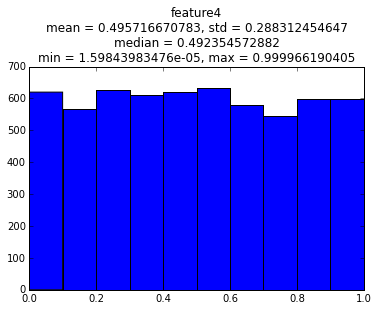

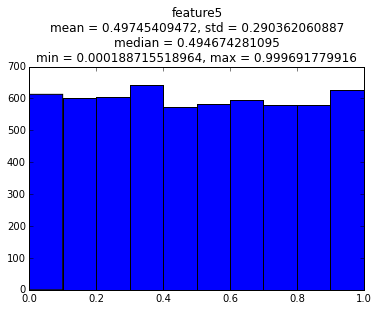

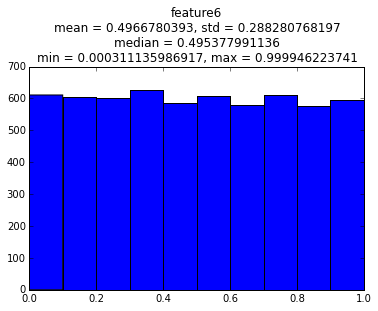

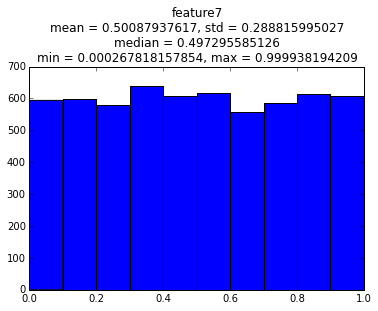

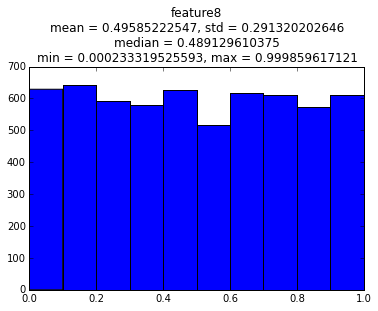

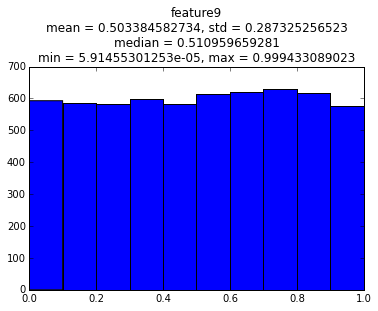

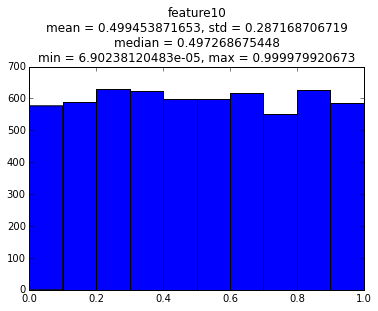

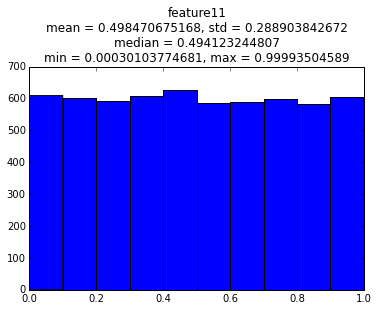

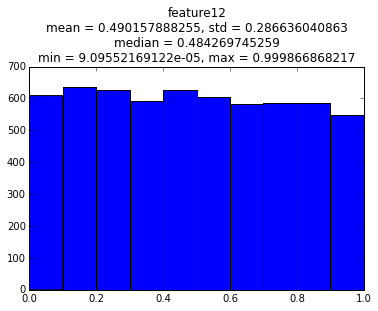

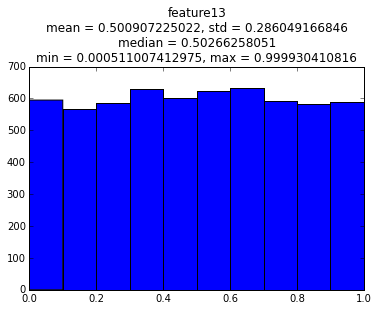

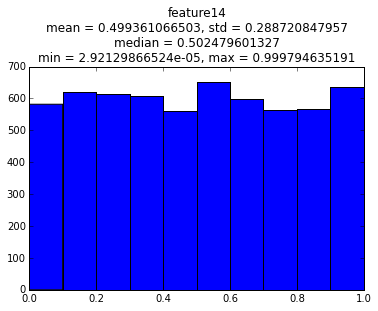

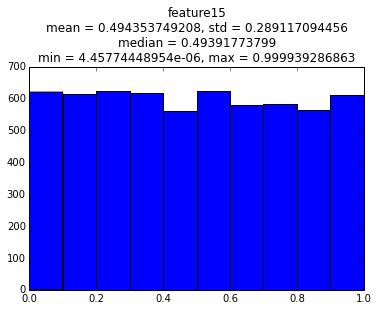

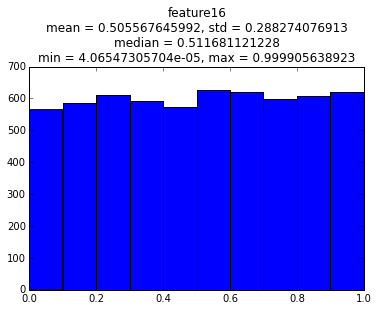

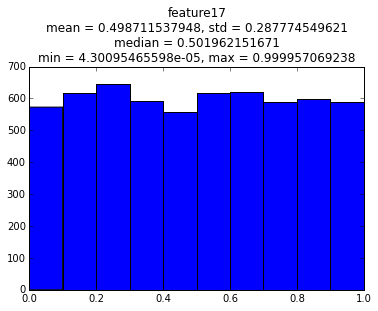

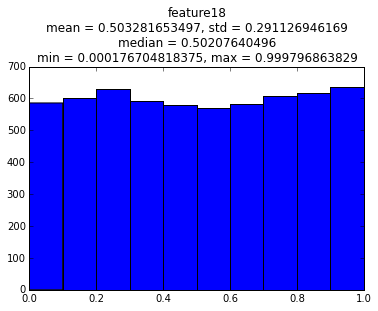

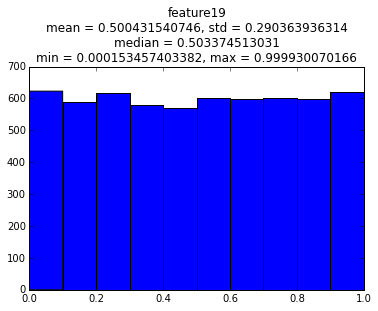

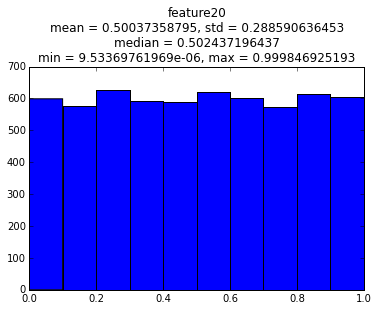

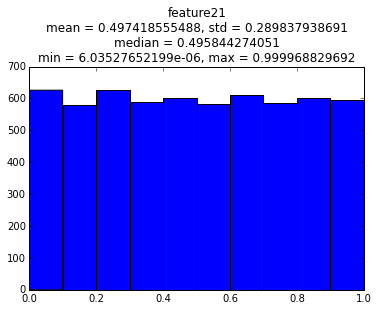

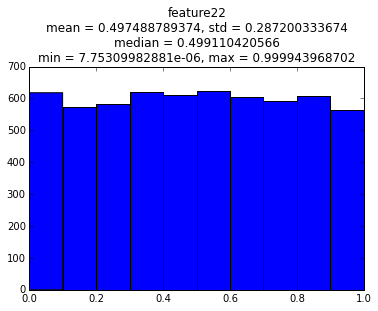

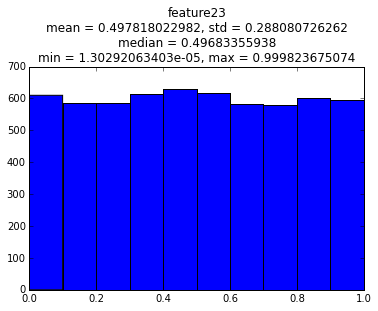

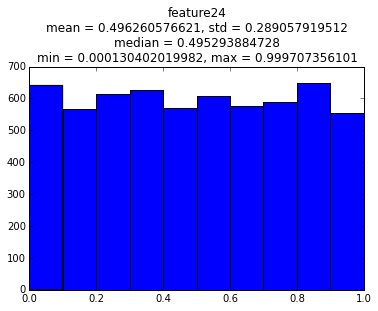

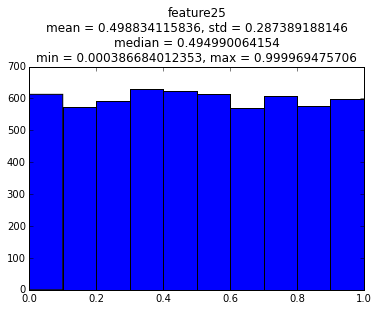

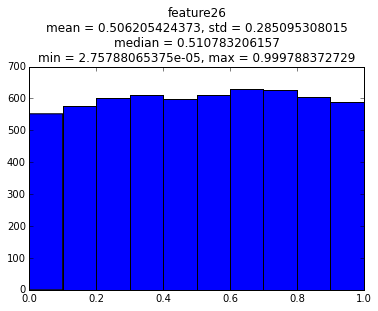

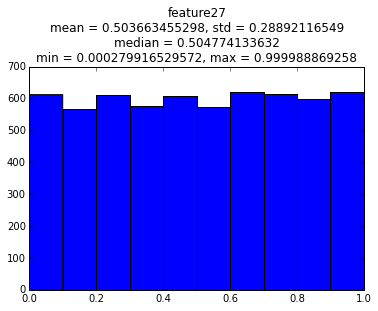

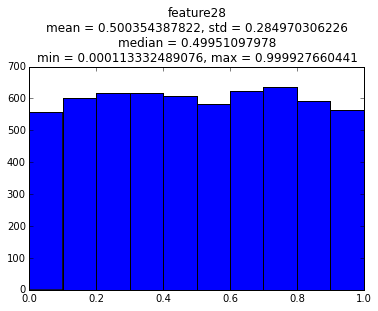

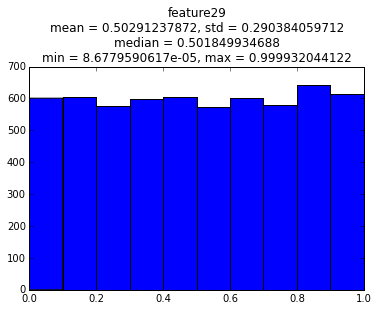

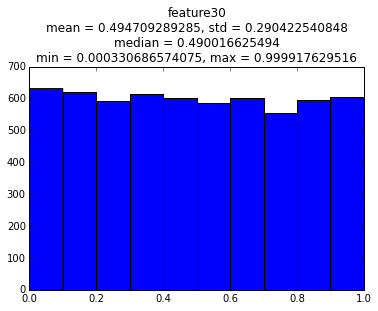

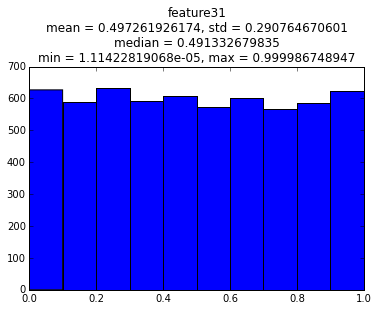

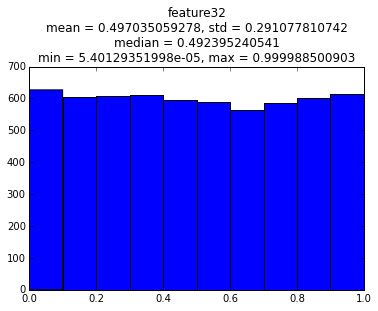

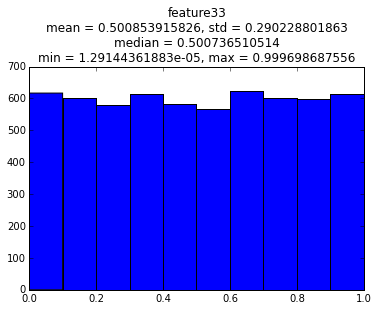

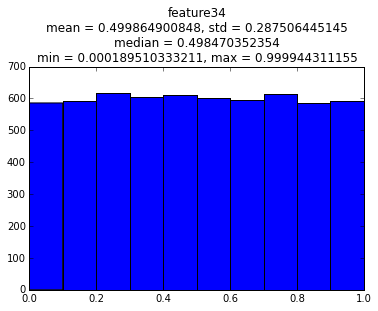

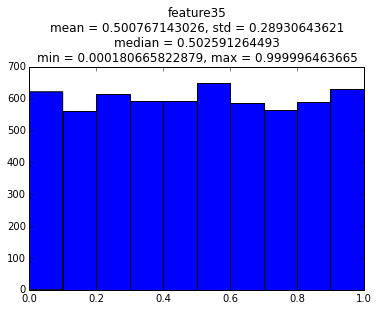

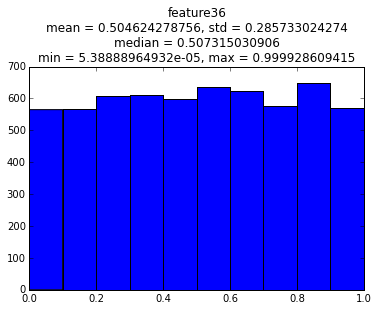

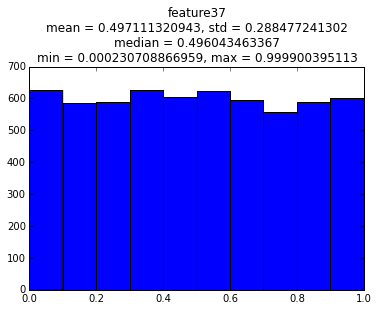

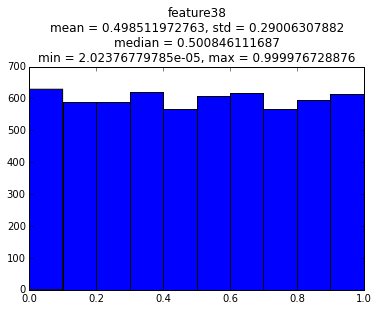

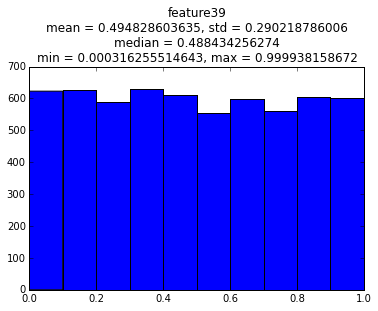

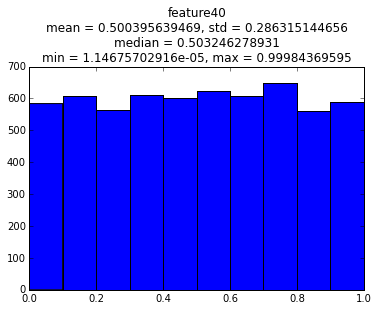

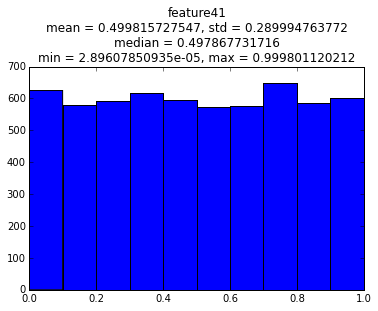

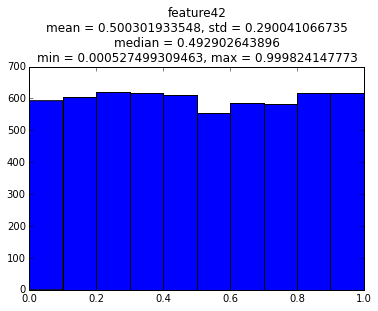

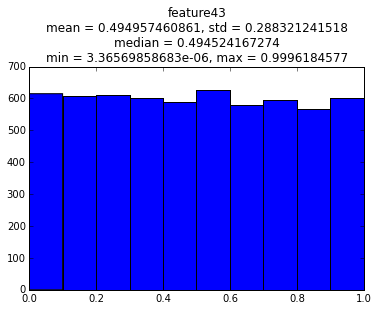

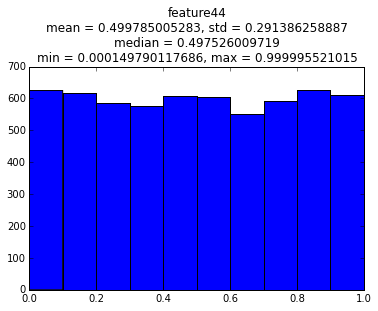

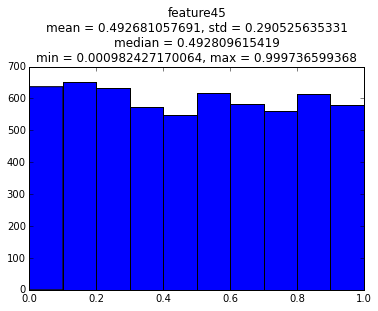

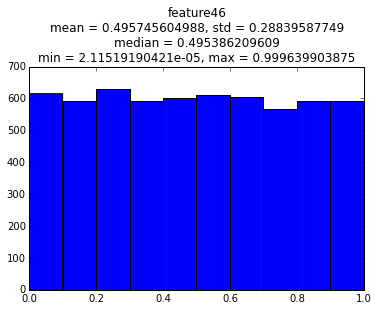

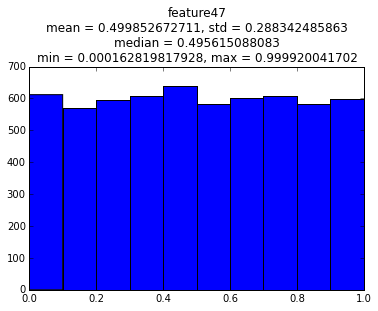

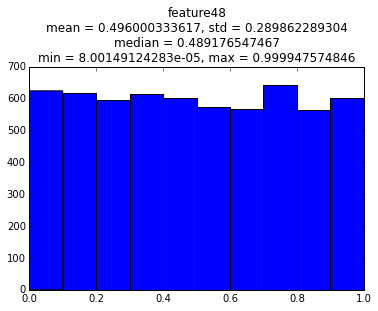

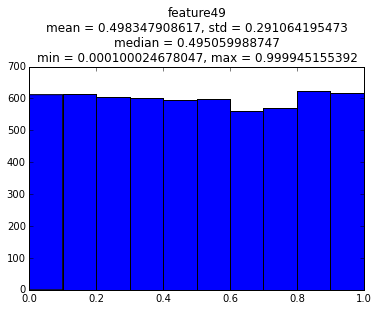

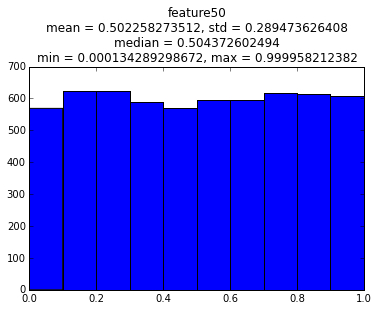

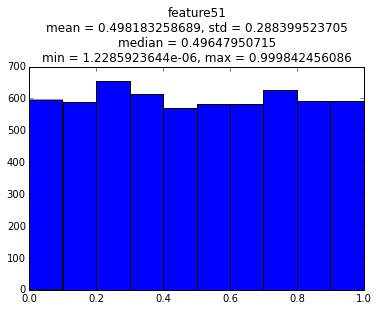

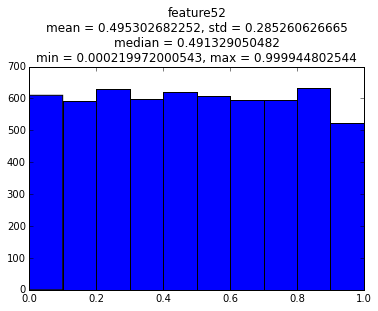

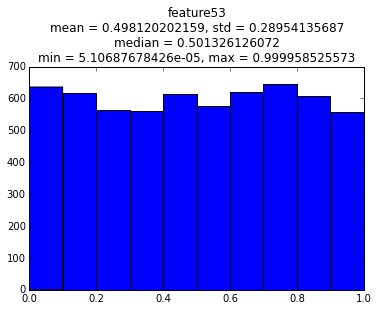

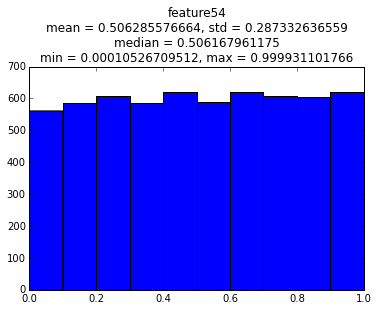

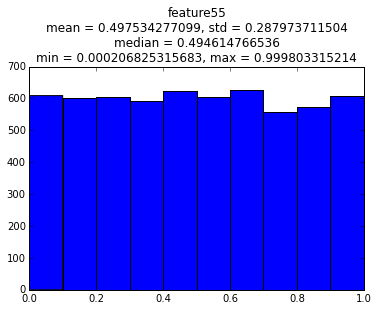

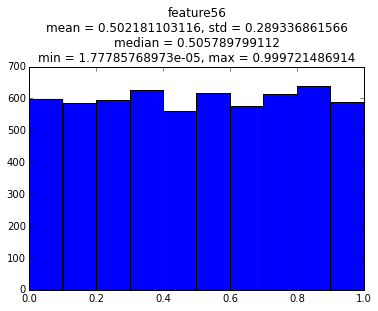

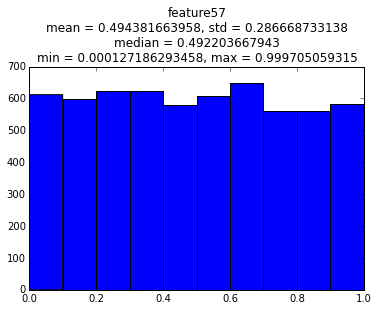

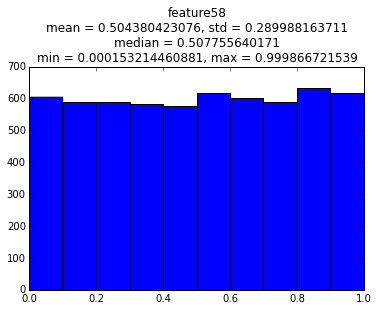

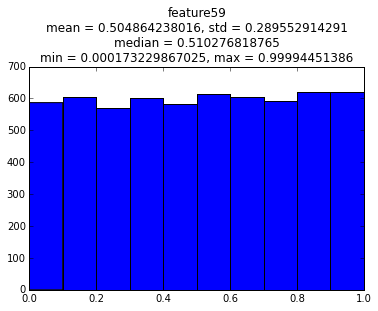

In [58]:
plot_distributions(data)

#Scikit PCA components distributions

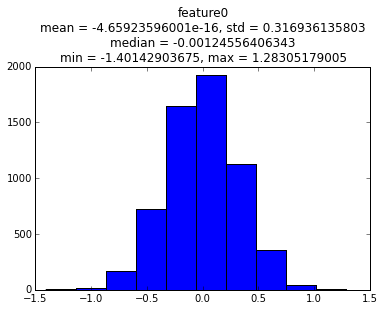

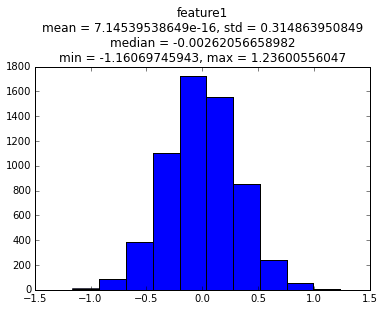

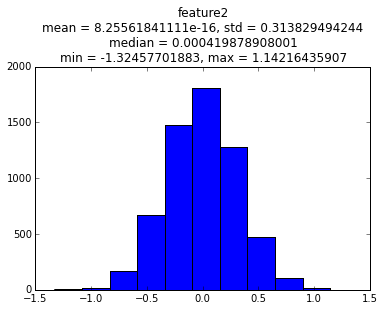

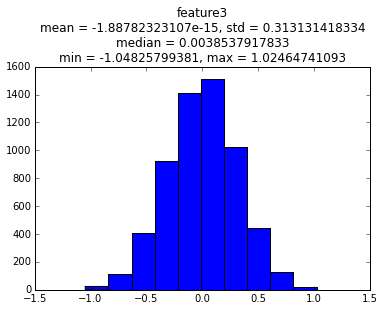

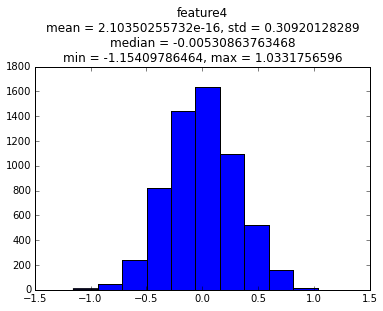

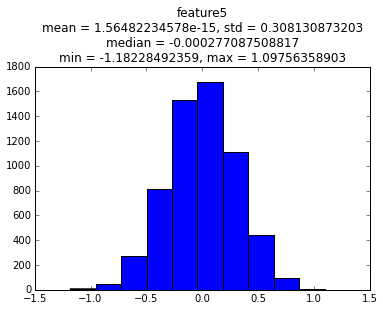

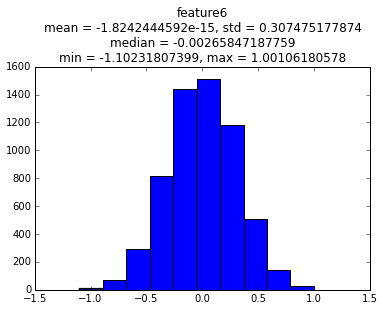

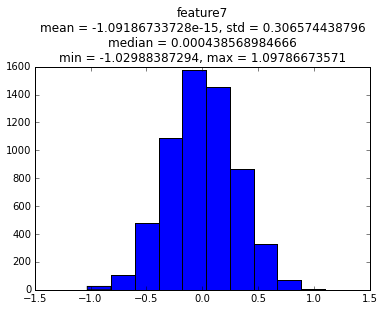

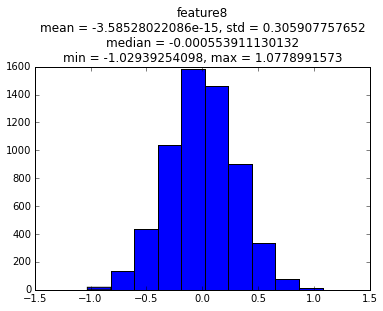

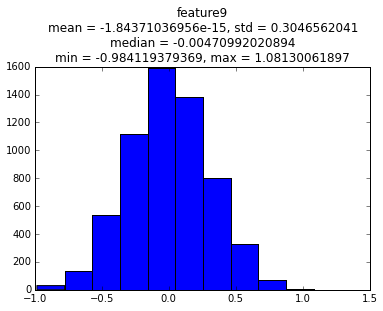

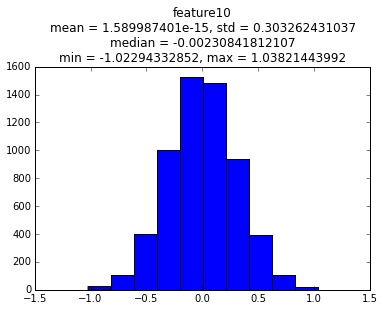

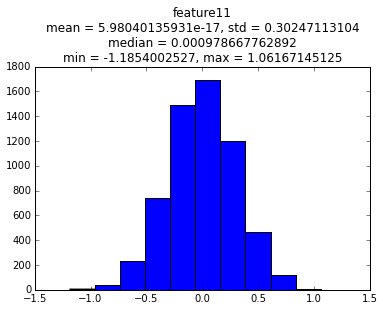

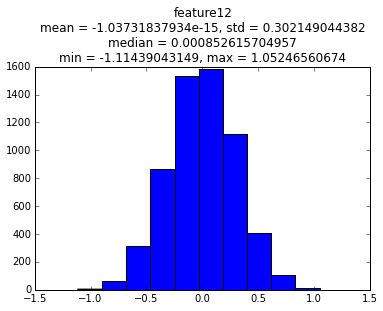

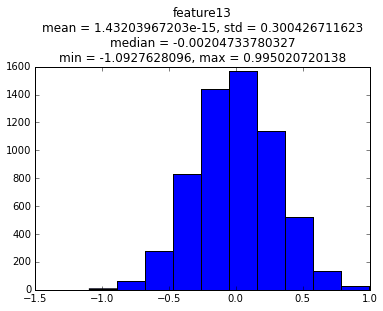

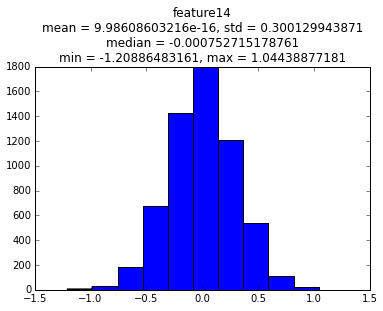

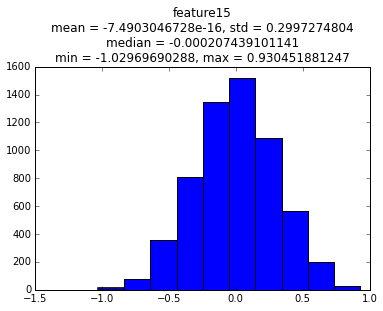

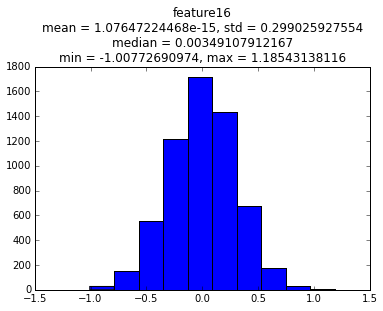

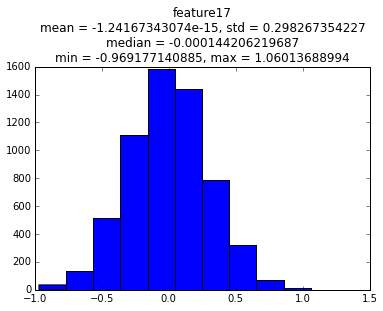

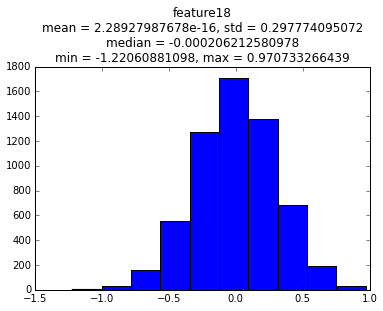

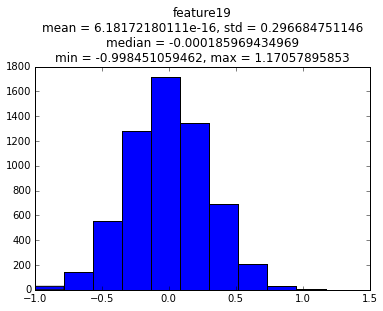

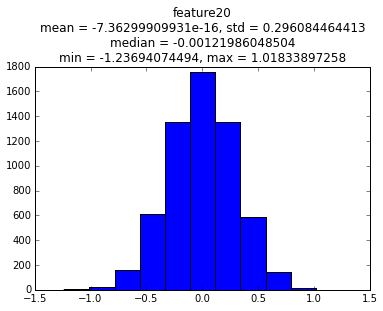

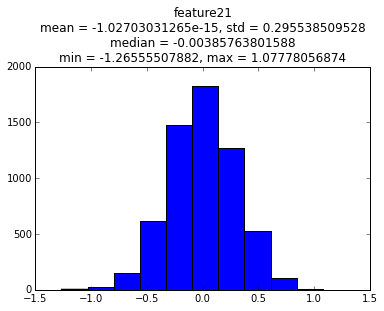

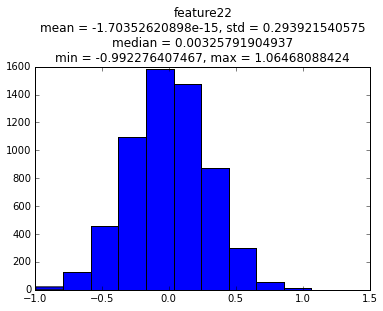

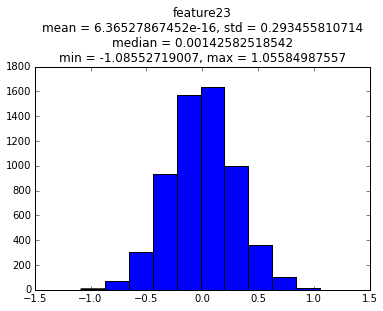

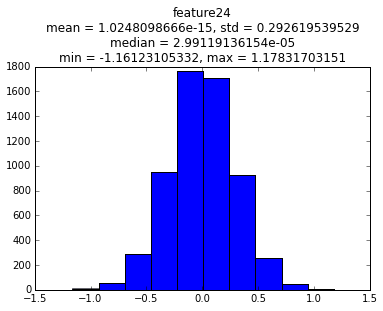

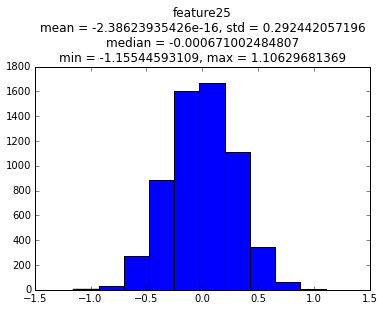

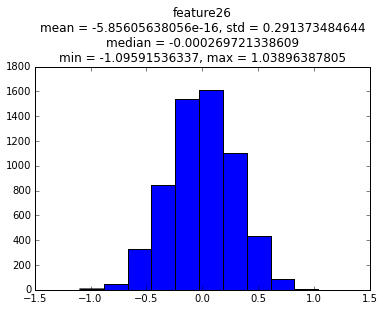

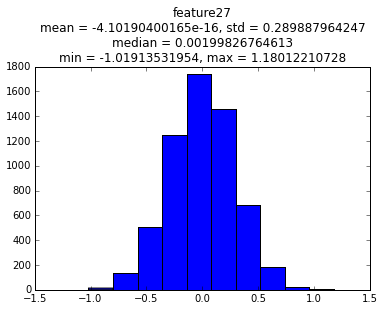

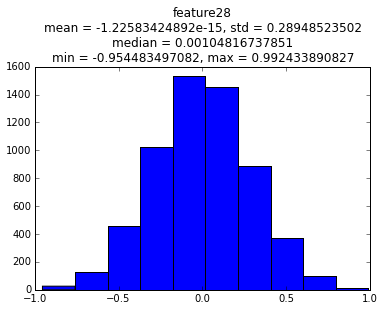

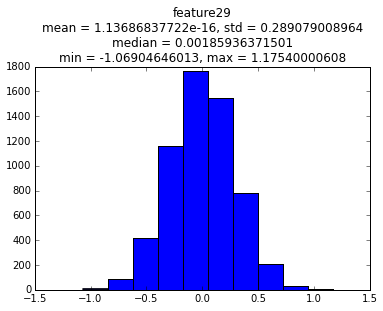

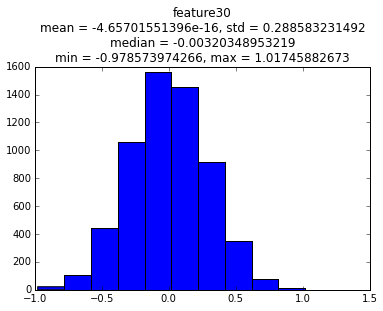

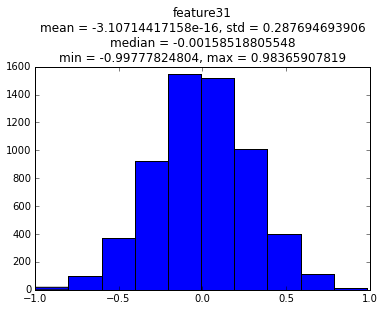

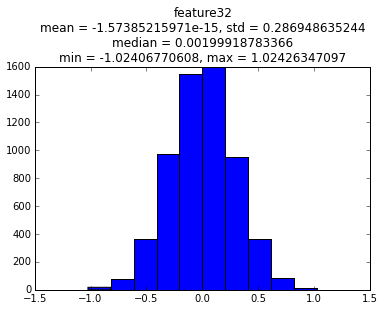

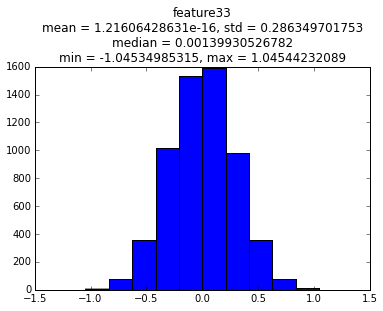

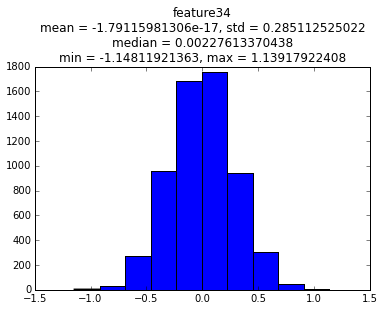

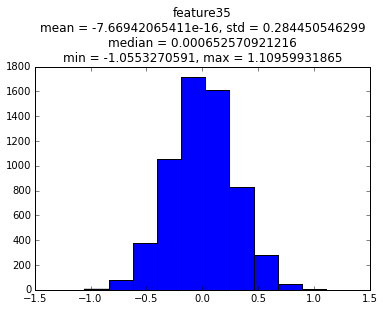

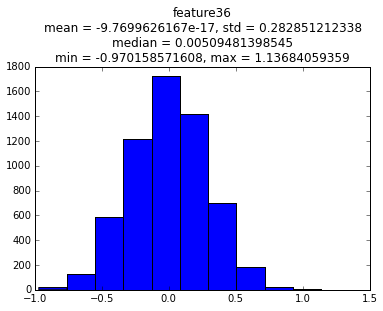

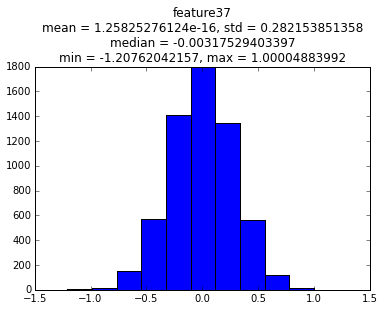

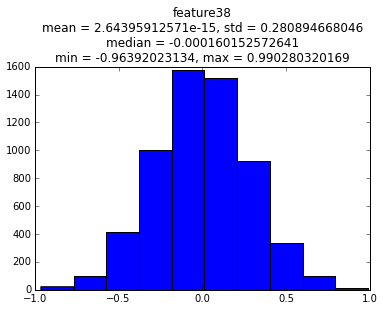

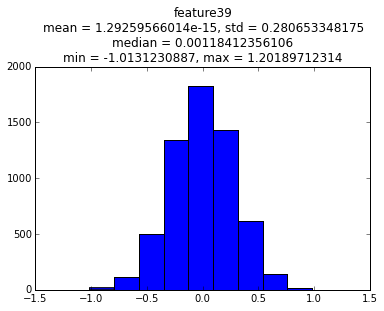

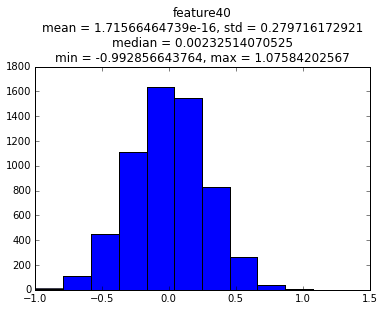

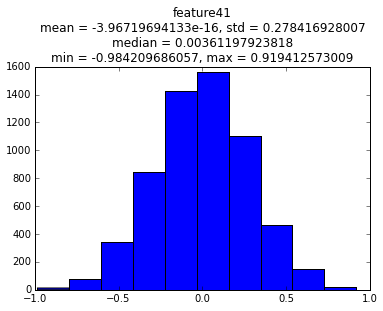

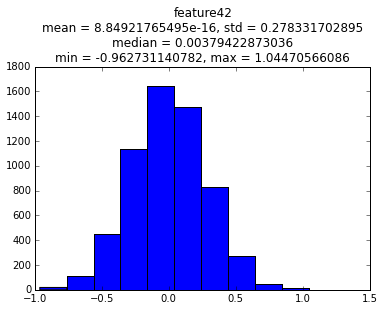

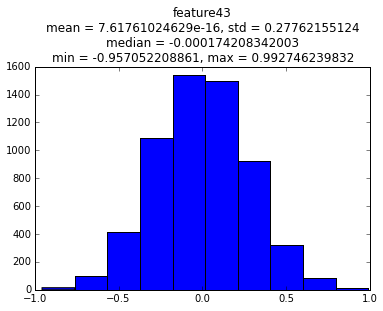

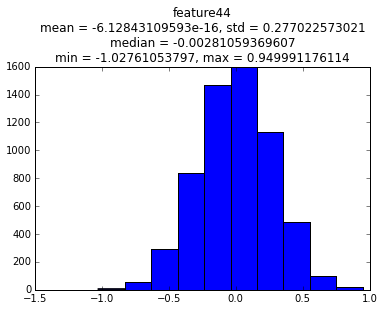

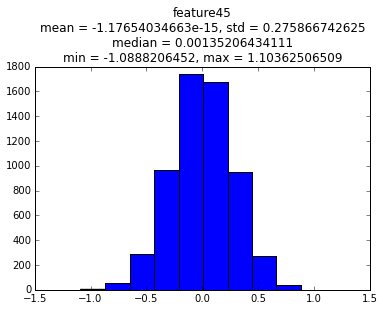

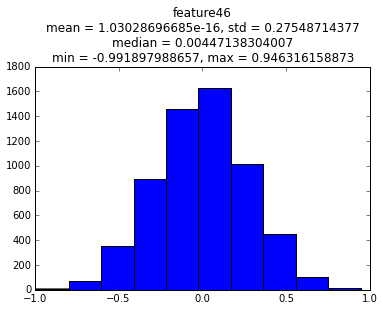

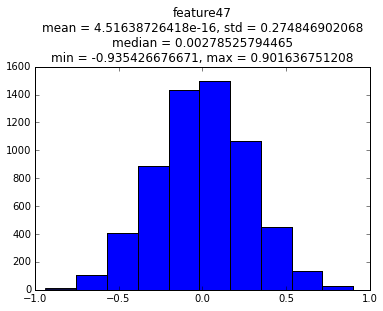

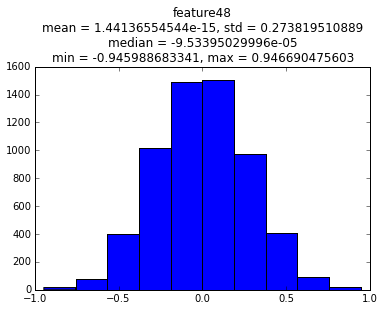

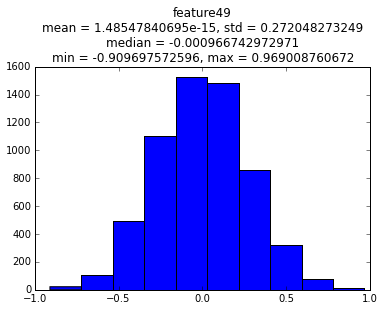

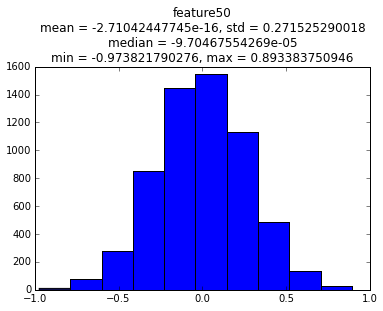

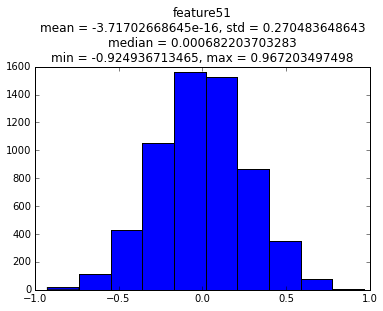

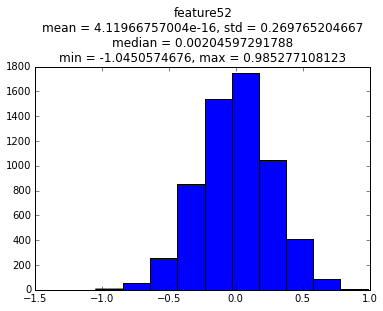

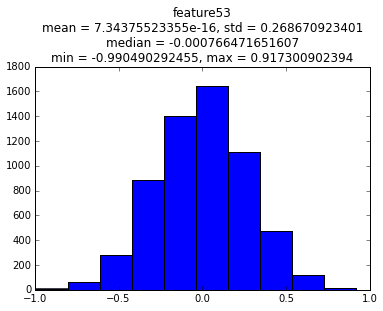

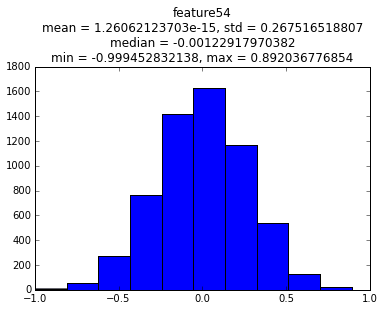

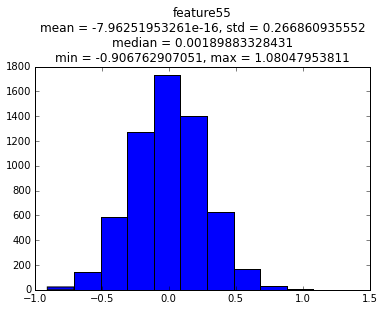

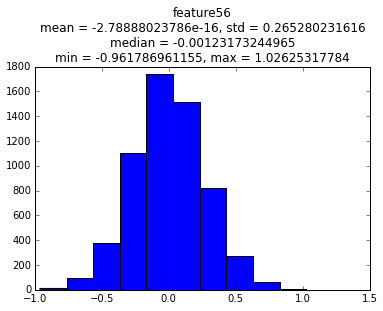

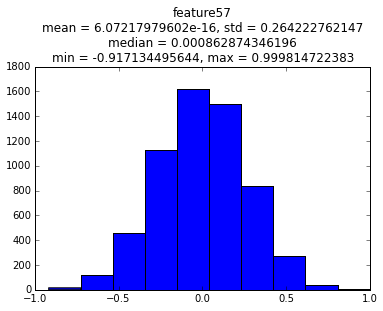

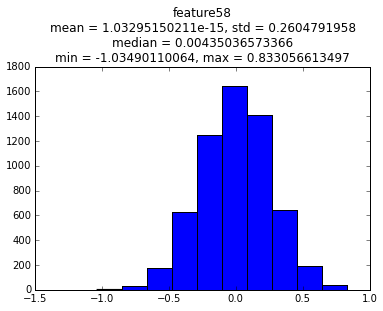

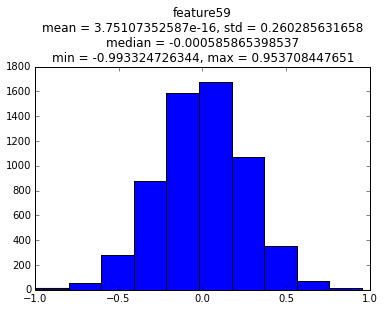

In [59]:
data_scikit_pca = PCA().fit_transform(data)
plot_distributions(data_scikit_pca)

#Standarized PCA components distributions

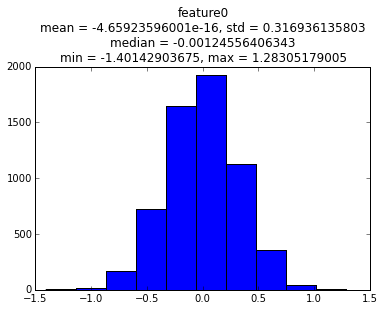

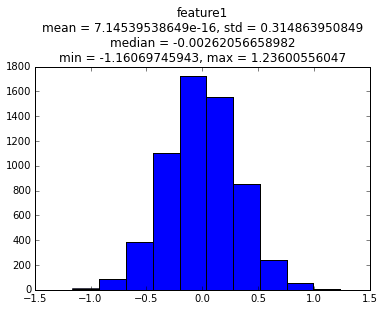

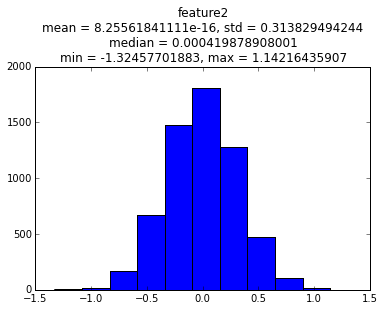

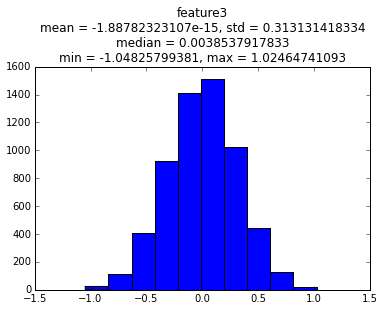

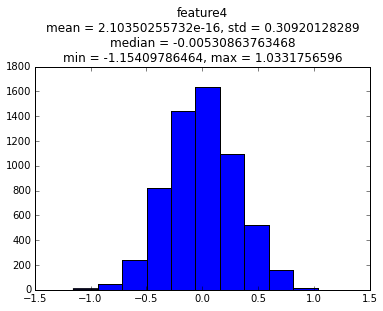

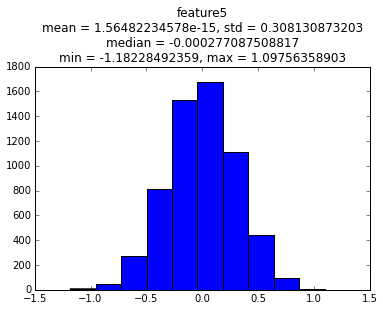

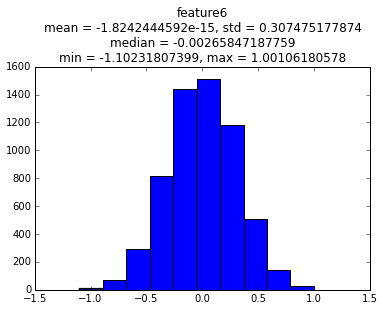

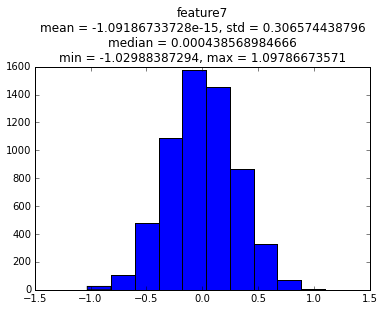

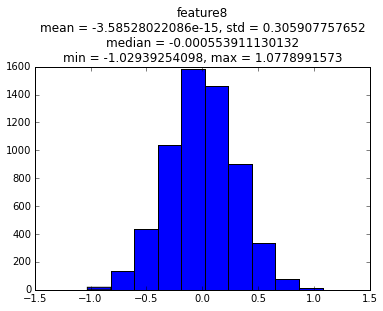

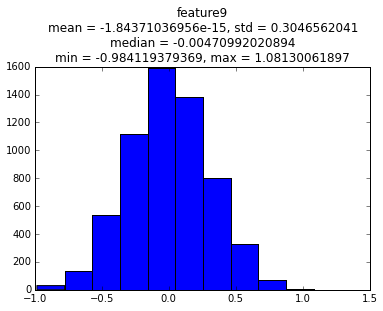

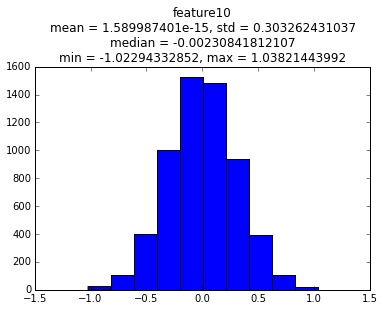

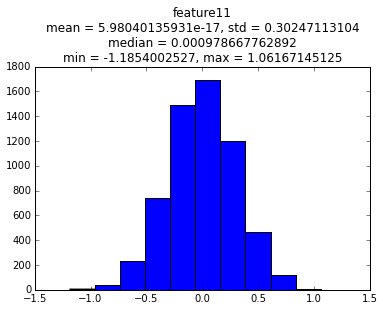

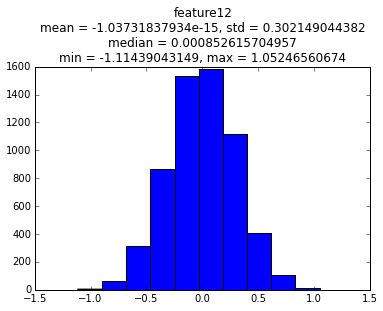

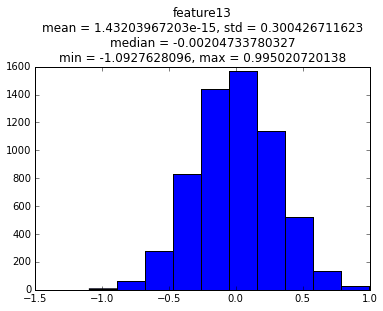

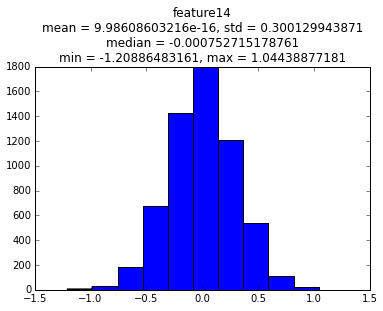

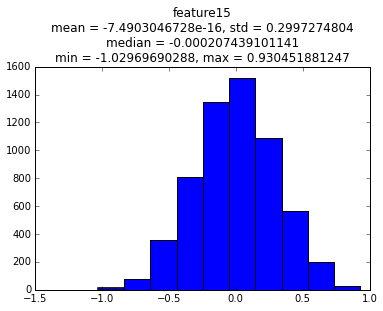

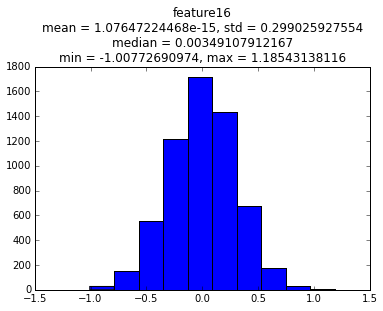

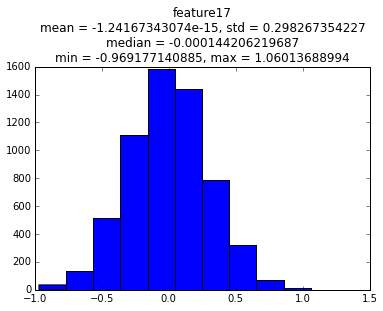

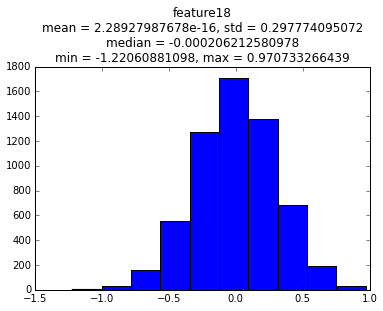

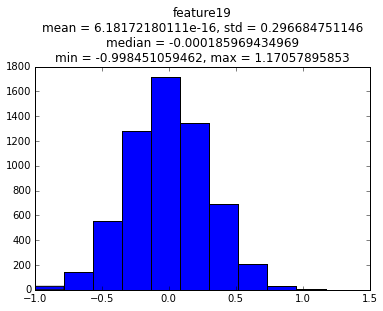

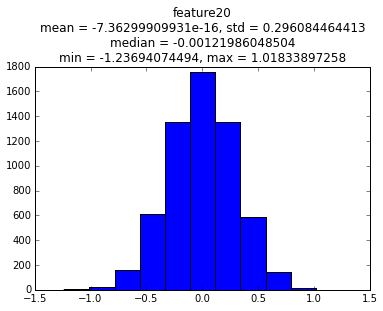

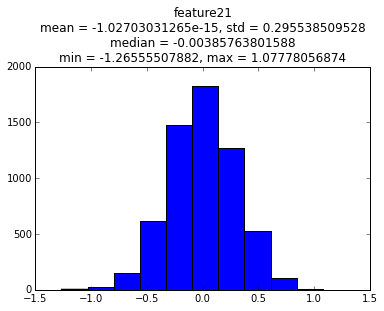

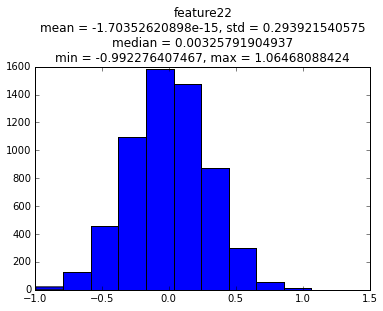

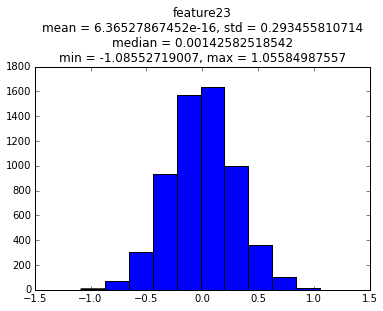

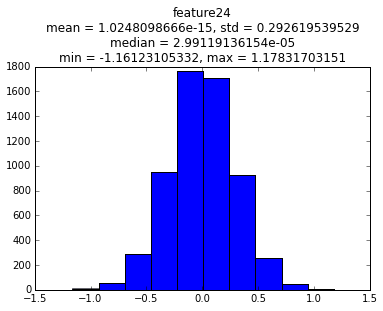

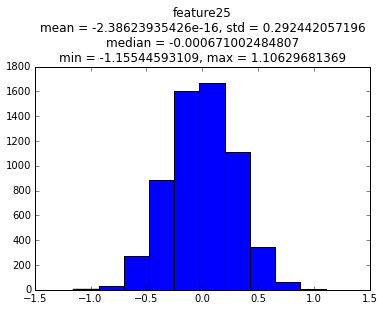

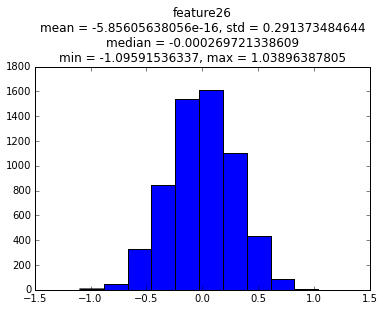

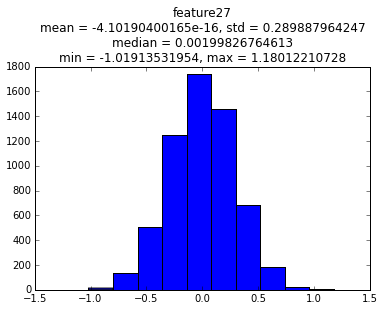

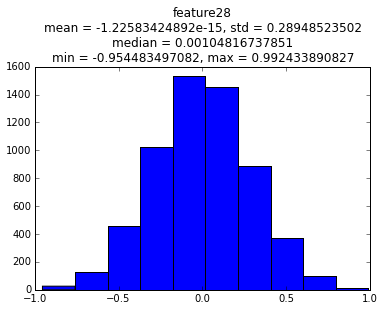

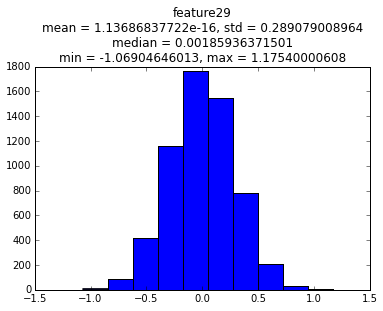

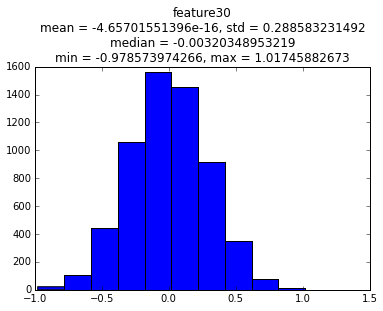

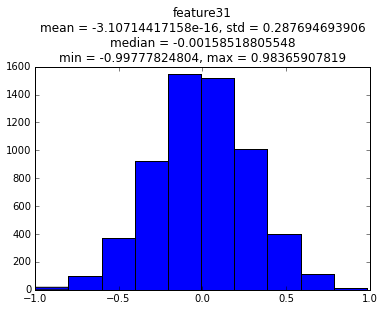

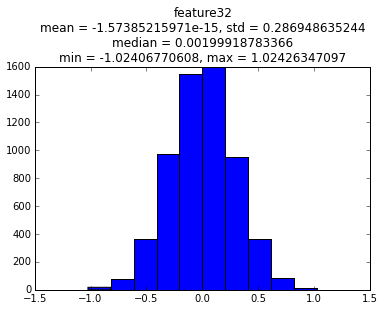

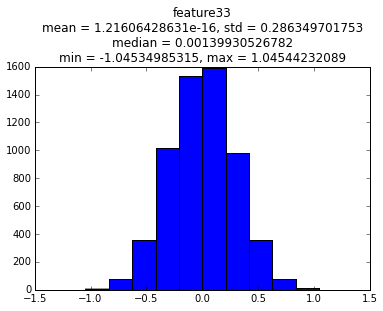

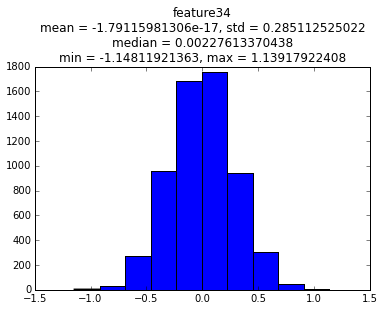

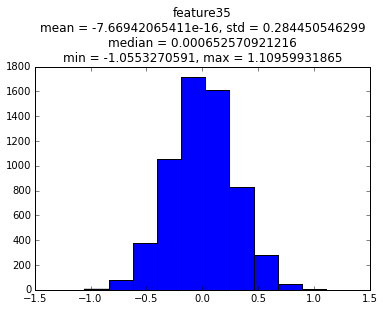

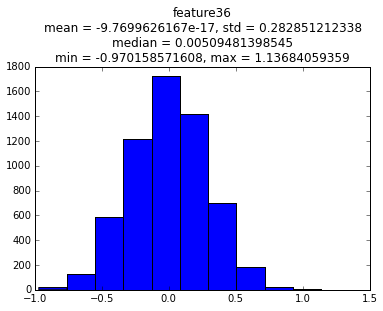

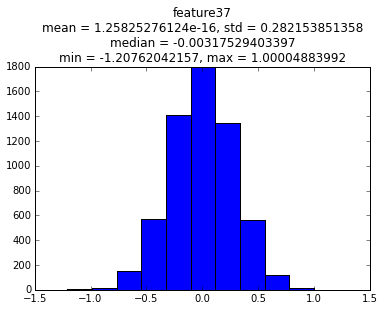

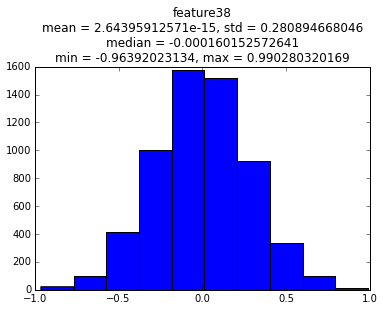

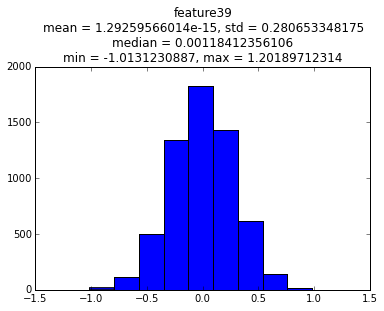

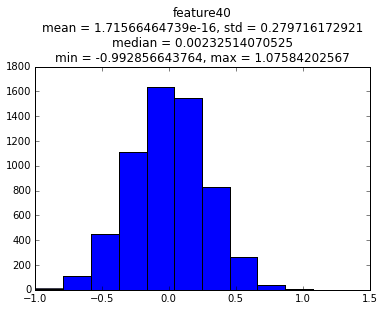

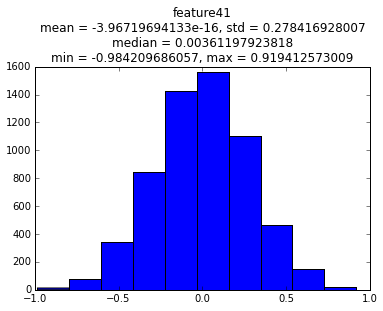

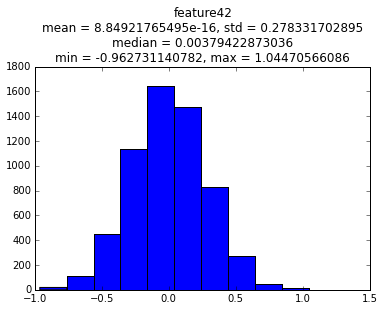

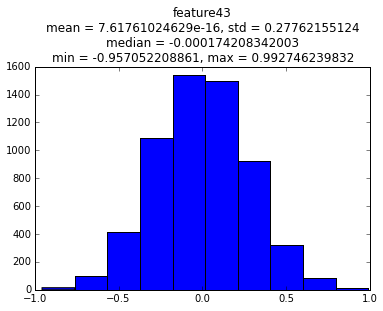

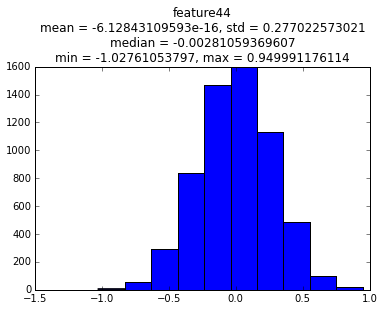

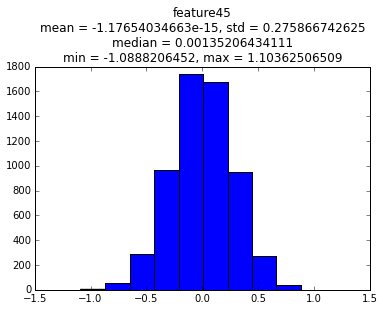

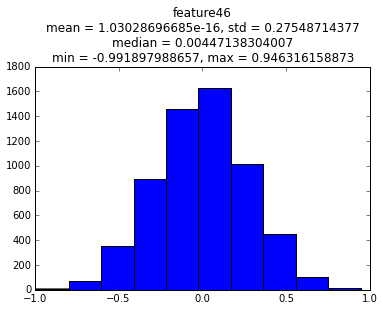

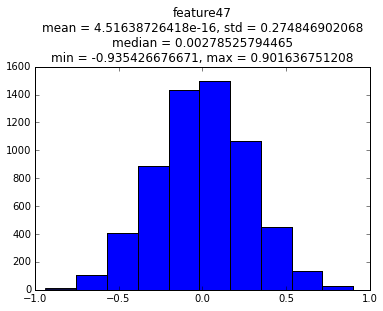

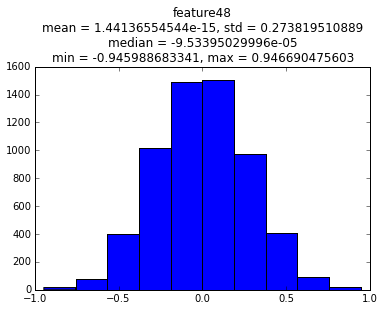

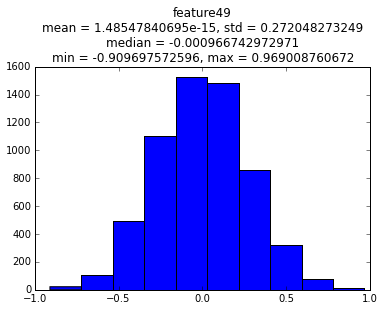

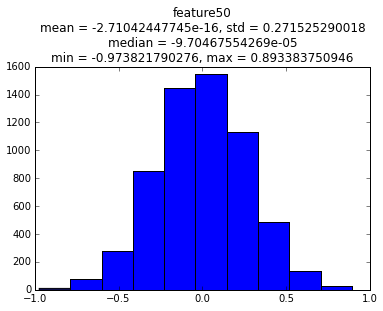

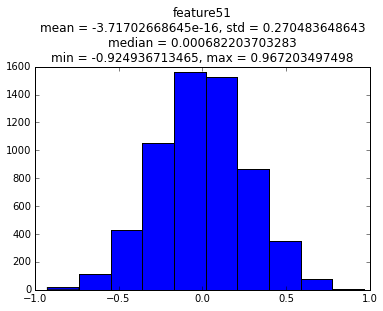

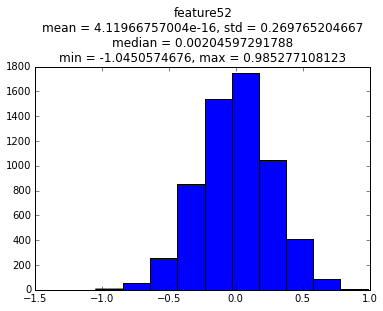

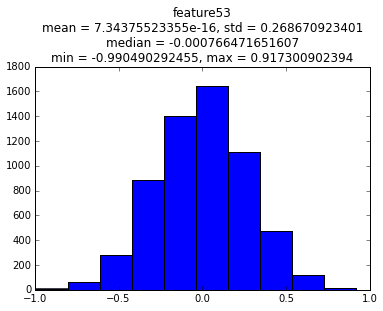

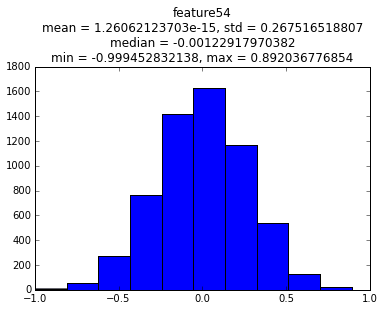

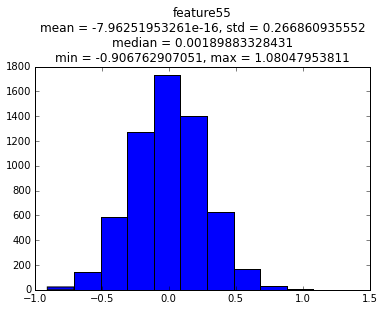

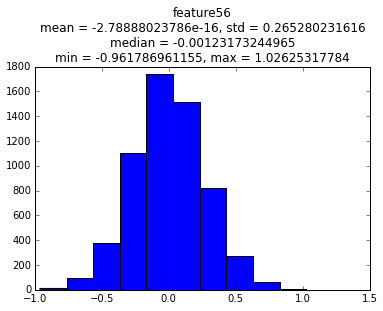

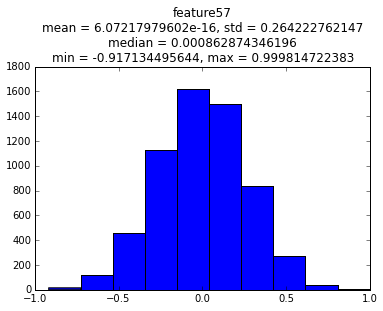

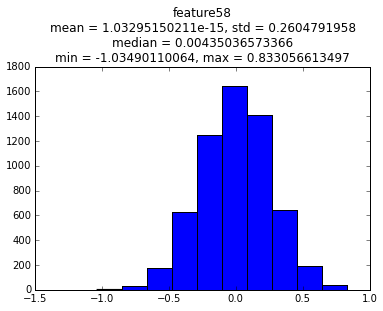

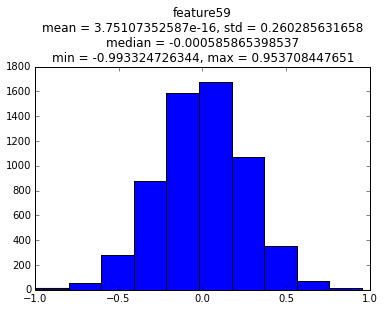

In [60]:
data_standarized_pca = StandarizedPCA().fit_transform(data)
plot_distributions(data_standarized_pca)

# Lucas unstandarized PCA components distributions

(60,)


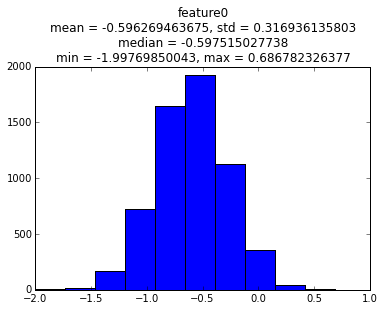

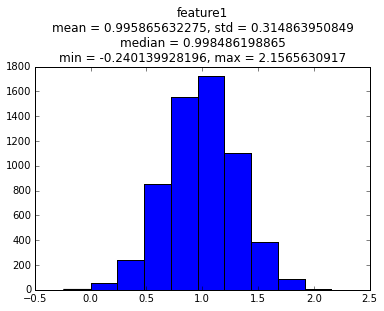

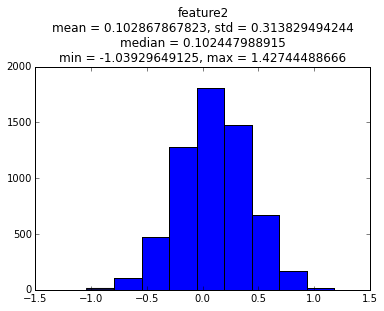

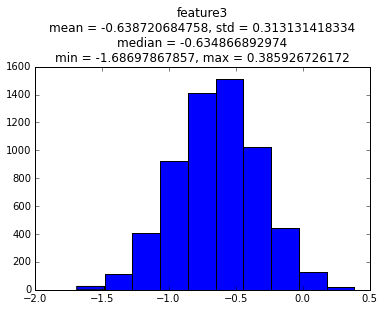

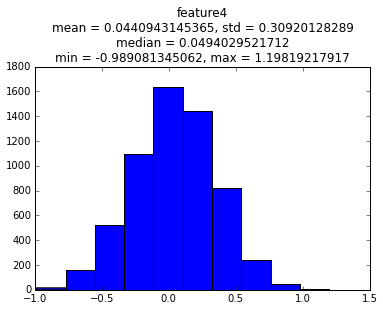

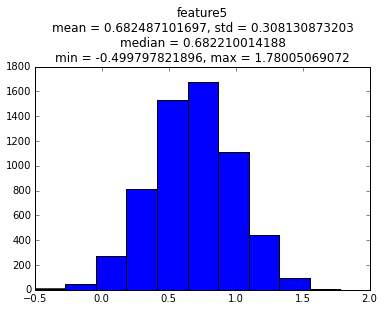

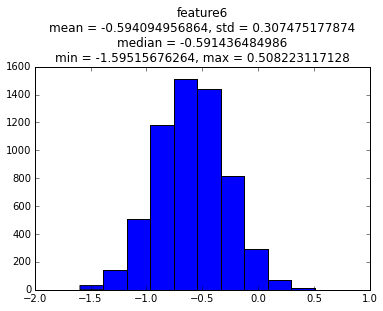

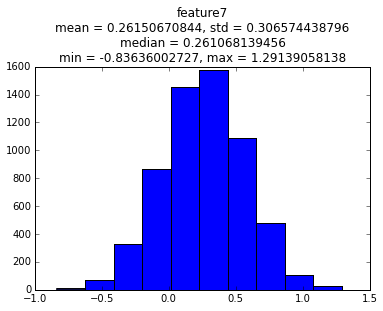

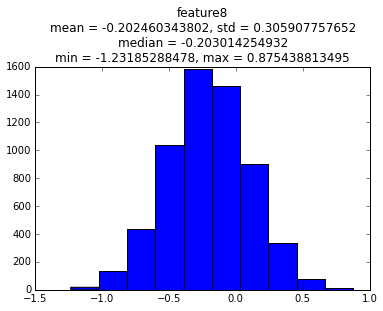

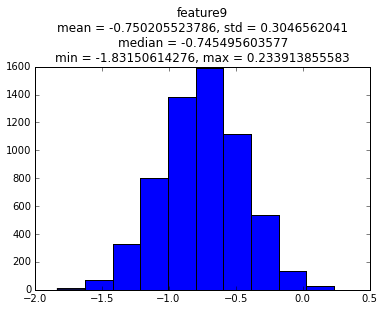

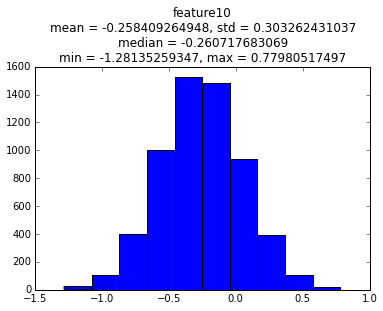

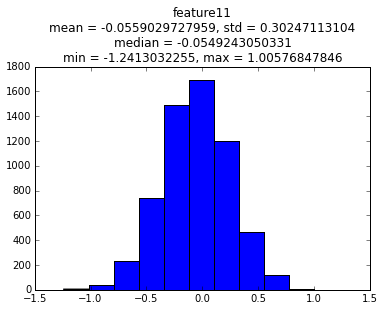

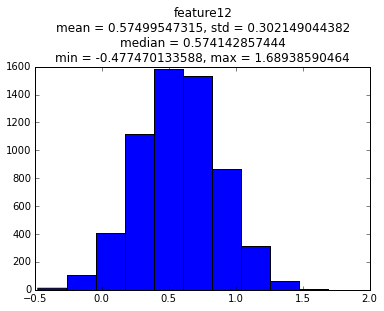

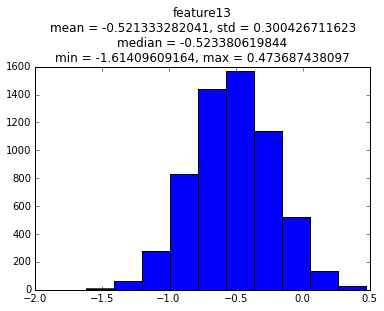

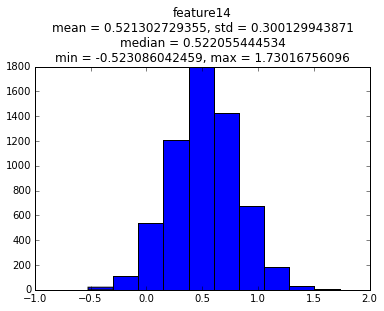

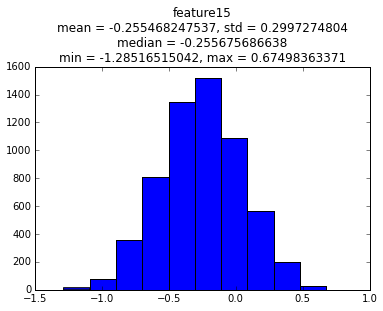

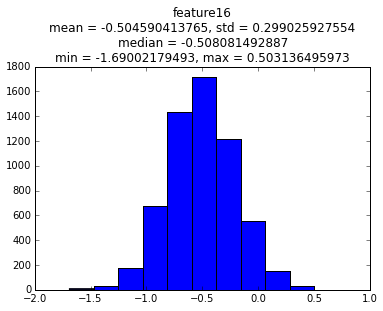

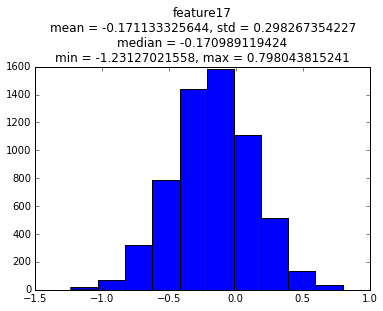

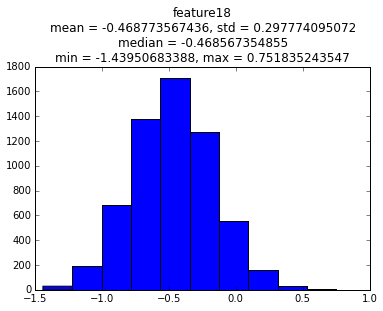

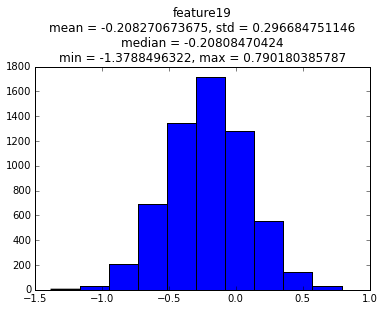

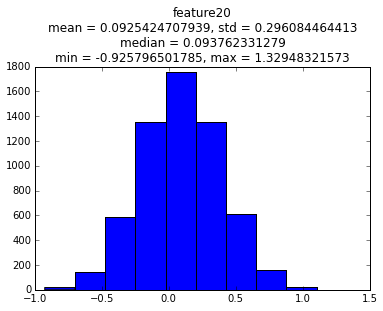

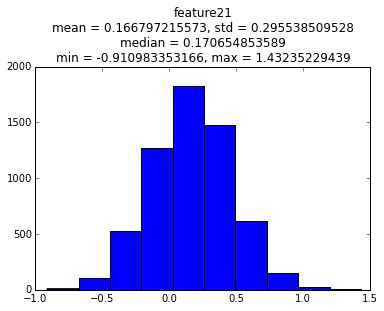

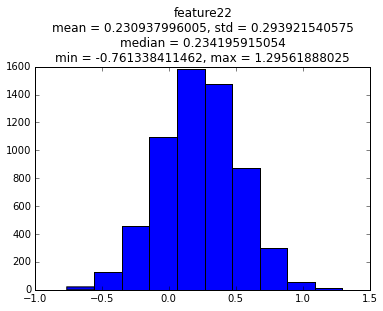

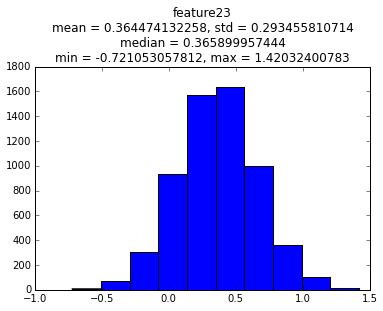

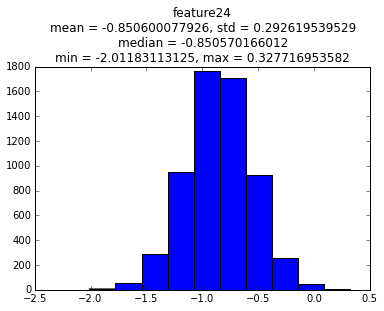

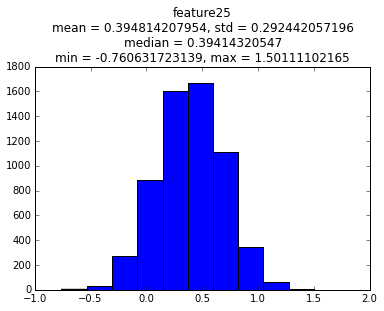

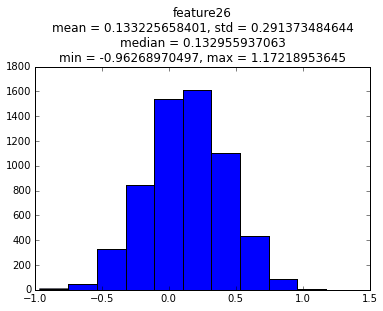

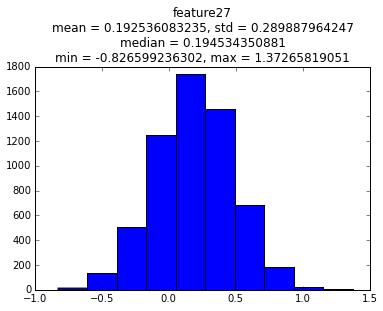

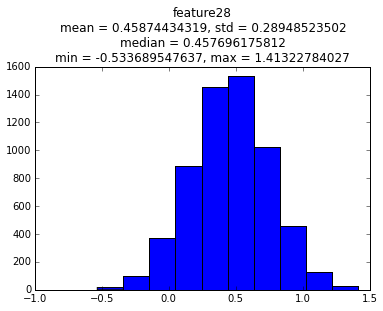

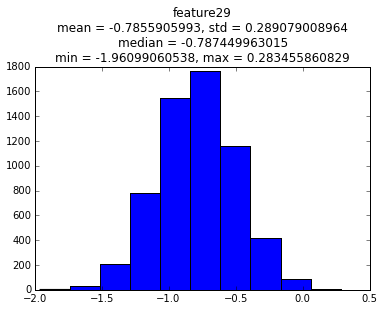

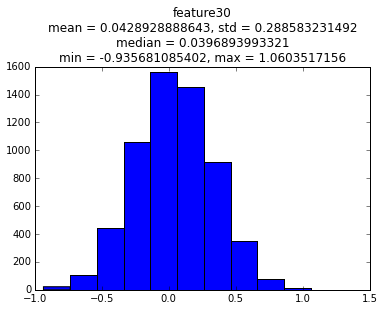

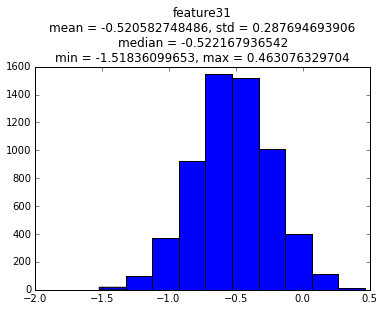

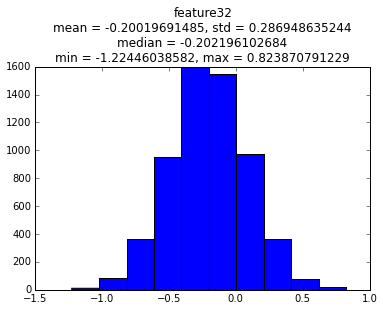

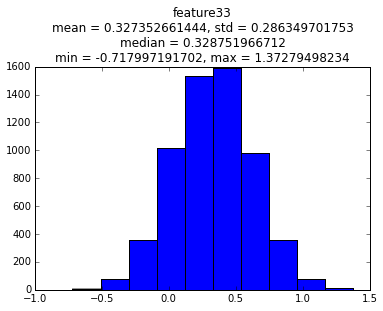

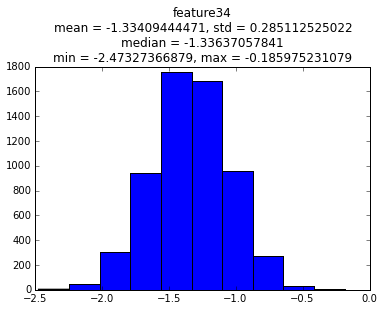

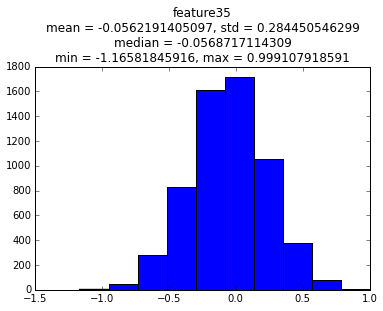

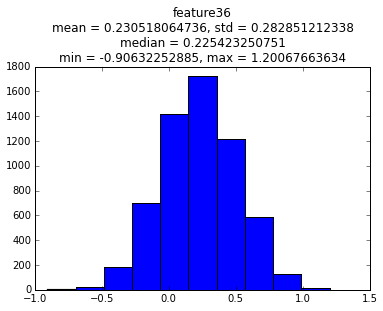

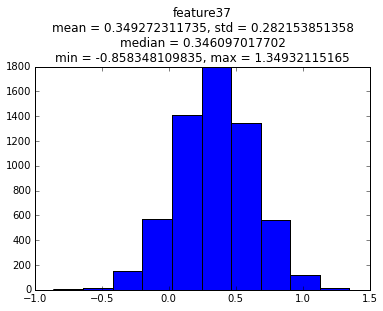

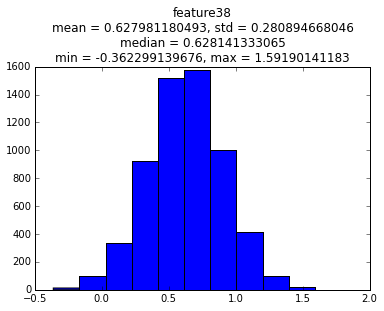

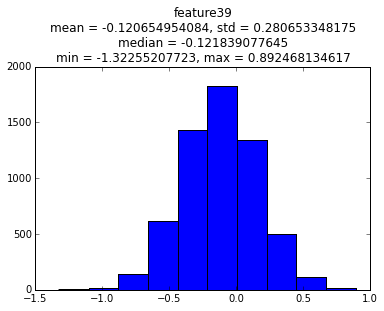

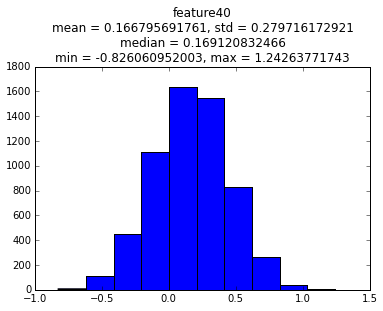

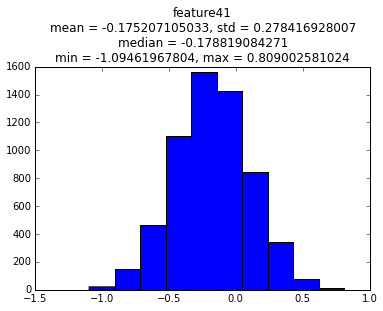

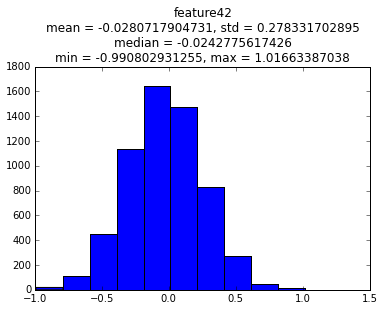

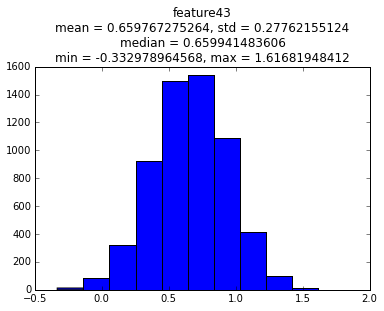

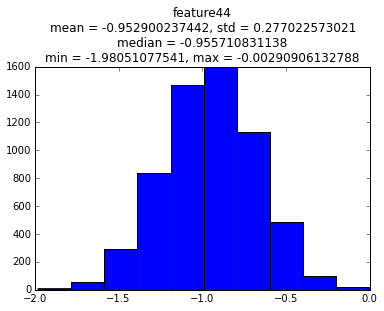

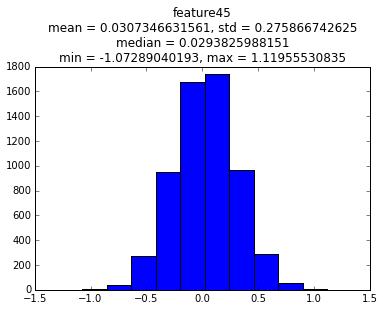

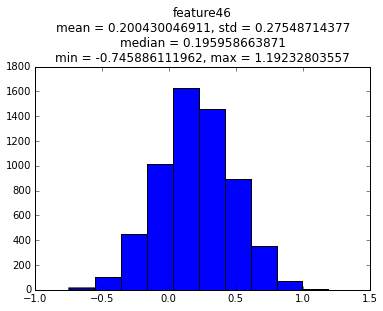

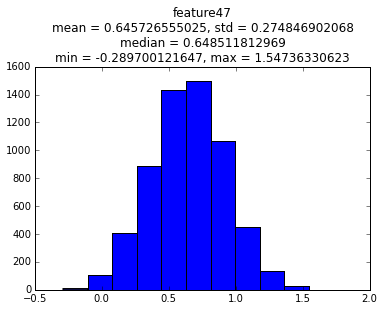

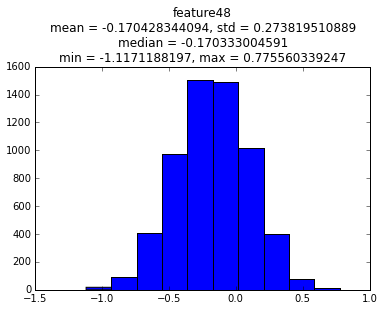

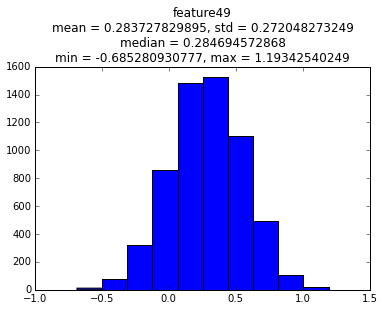

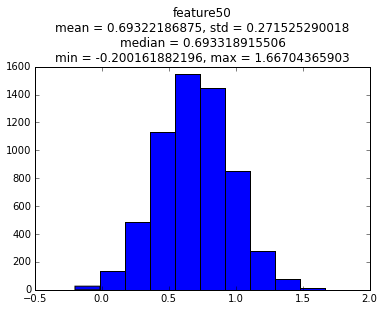

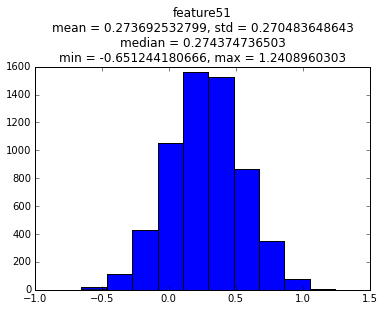

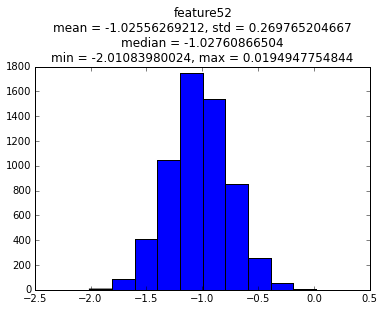

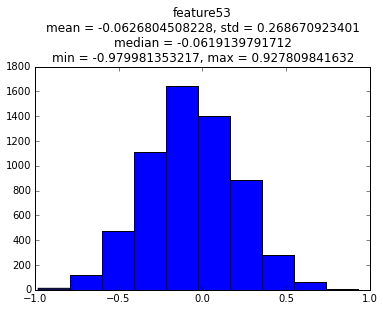

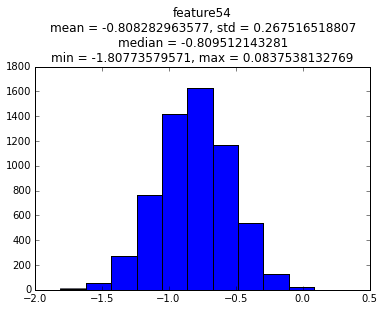

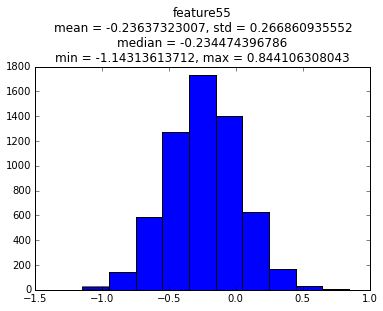

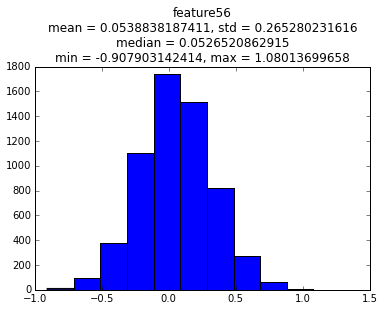

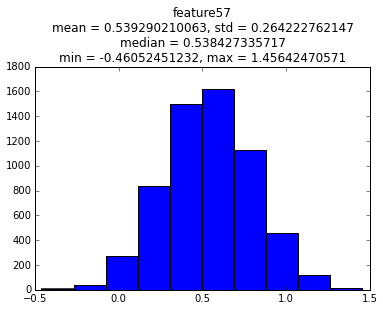

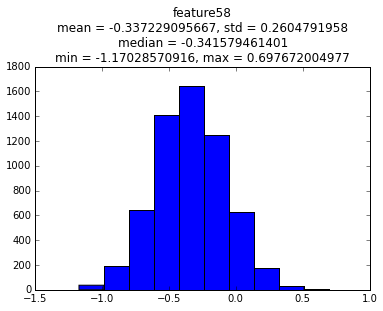

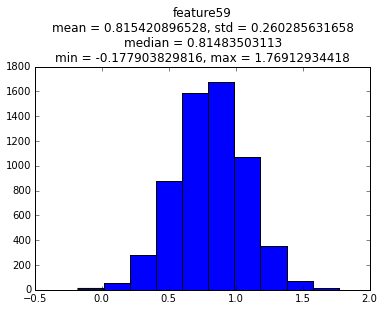

In [61]:
data_unstd_lucas = LucasPCA(None, False).fit_transform(data)
plot_distributions(data_unstd_lucas)

In [62]:
data

array([[ 0.88682741,  0.85162728,  0.59129582, ...,  0.26979499,
         0.66721063,  0.7280694 ],
       [ 0.48204364,  0.04878482,  0.64104277, ...,  0.68507916,
         0.52381452,  0.24455938],
       [ 0.49951321,  0.33197263,  0.60558806, ...,  0.13469415,
         0.50969331,  0.33085399],
       ..., 
       [ 0.36252982,  0.41573348,  0.27829291, ...,  0.35270868,
         0.49352284,  0.4716944 ],
       [ 0.20080158,  0.32666605,  0.91455884, ...,  0.41944282,
         0.58231836,  0.33106993],
       [ 0.27770939,  0.31514347,  0.37025491, ...,  0.97636833,
         0.64434792,  0.11603845]])